In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import pandas as pd
# Plot Images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
plt.style.use('ggplot')
import matplotlib
# Set GPU usage
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# Plotly 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
cd ..

/home/albert/aip-eval


In [3]:
from studio.evaluation.keras import metrics, utils, visualizer
from studio.evaluation.keras.evaluators import CNNEvaluator
from studio.evaluation.keras.evaluators import Evaluator
from studio.evaluation.keras.evaluators import SequentialCNNEvaluator

Using TensorFlow backend.


In [4]:
# Models path
first_gate_model_path = '/data/models/first_gate_march/xception/model_max_acc_1gpu.h5'
ensemble_models_dir= '/data/models/133_way_april_2019/ensemble'

In [5]:
# Data directory
all_images_dir = '/data/datasets/image_quality_march_2019/app_incoming_quality/'
bad_images_dir = '/data/datasets/image_quality_march_2019/app_incoming_quality/00000_bad_quality'
good_images_dir = '/data/datasets/image_quality_march_2019/app_incoming_quality/00001_good_quality'
all_with_mid_images_dir = '/data/datasets/image_quality_march_2019/app_incoming_quality_with_mid'

In [6]:
# Data directory
app_incoming_images = '/data/datasets/133_way_150_min_april_2019/app_first_gate_133/'
app_incoming_images_manifest = '/data/datasets/133_way_150_min_april_2019/app_first_gate_133/manifest.json'

df_manifest = pd.read_json(app_incoming_images_manifest)

df_manifest

# Modify labels and get image list
labels_list = []
image_list = []
ids_multiple_aip = []
for idx, row in df_manifest.iterrows():
    aip_tags = [tag for tag in row.tags if 'AIP' in tag]
    labels_list.append(row.tags)
    image_list.append(os.path.join(app_incoming_images, row.filename))
labels_list = np.array(labels_list)
image_list = np.array(image_list)

In [7]:
gates_configuration_path = ['example/first_gate.yaml', 'example/n_way_gate.yaml']

In [8]:
sq_cnn_eval = SequentialCNNEvaluator(
    id='App model',
    gates_configuration_path=gates_configuration_path
)

Instructions for updating:
Colocations handled automatically by placer.


/home/albert/aip-eval/.venv/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning:

No training configuration found in save file: the model was *not* compiled. Compile it manually.



Loading model  model_max_acc_1gpu.h5
Loading model  model_max_acc_1gpu.h5
Loading model  model_max_acc_1gpu.h5


SystemError: unknown opcode

In [9]:
results = sq_cnn_eval.evaluate(image_list, labels_list, top_k=10) 

NameError: name 'sq_cnn_eval' is not defined

In [13]:
sq_cnn_eval.show_results('average')

,id,accuracy_top_1,accuracy_top_2,accuracy_top_3,accuracy_top_4,accuracy_top_5,accuracy_top_6,accuracy_top_7,accuracy_top_8,accuracy_top_9,accuracy_top_10,weighted_precision,sensitivity,precision,f1_score,number_of_samples,number_of_classes
0,App model,0.513,0.621,0.672,0.707,0.738,0.756,0.773,0.782,0.787,0.803,0.562,0.207,0.217,0.502,427,136


In [14]:
sq_cnn_eval.show_results('individual')

,id,class,sensitivity_top_1,sensitivity_top_2,sensitivity_top_3,sensitivity_top_4,sensitivity_top_5,sensitivity_top_6,sensitivity_top_7,sensitivity_top_8,sensitivity_top_9,sensitivity_top_10,precision,f1_score,TP,FP,FN,n_samples,% samples
0,App model,not skin,0.893,0.893,0.893,0.893,0.893,0.893,0.893,0.893,0.893,0.893,0.926,0.909,25,2,3,28,6.56
1,App model,tattoo,0.500,0.600,0.600,0.600,0.600,0.600,0.600,0.600,0.600,0.600,0.714,0.588,5,2,5,10,2.34
2,App model,clear skin,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,20,14,14,34,7.96
3,App model,acne scarring,0.167,0.333,0.333,0.333,0.500,0.500,0.500,0.500,0.500,0.833,1.000,0.286,1,0,5,6,1.41
4,App model,acne variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,1,0,0,0.00
5,App model,acne vulgaris,0.929,0.929,0.929,0.929,0.929,0.929,0.929,0.929,1.000,1.000,0.650,0.765,13,7,1,14,3.28
6,App model,acneiform eruption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.00
7,App model,actinic keratosis,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,NaN,0,1,1,1,0.23
8,App model,asteototic eczema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.00
9,App model,atopic dermatitis,0.438,0.500,0.500,0.500,0.688,0.688,0.750,0.750,0.750,0.750,0.875,0.583,7,1,9,16,3.75


/home/albert/github_repos/aip-eval/studio.evaluation.keras/visualizer.py:41: RuntimeWarning:

invalid value encountered in true_divide



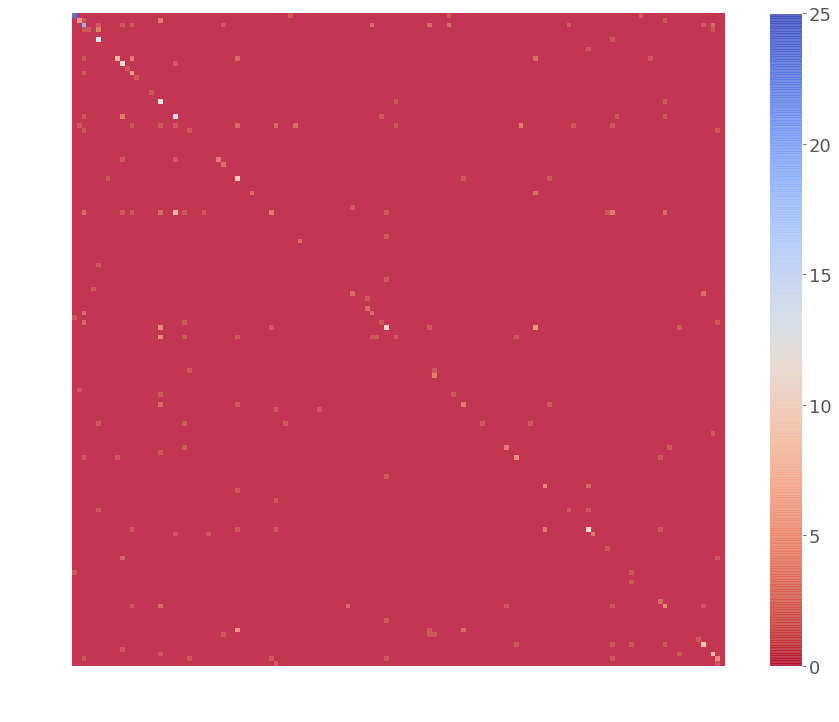

In [16]:
sq_cnn_eval.plot_confusion_matrix(results['average']['confusion_matrix'], concept_labels=sq_cnn_eval.concepts_evaluation,
                                 show_text=False, show_labels=False)

In [15]:
sq_cnn_eval.plot_top_k_accuracy()

In [55]:
sq_cnn_eval.plot_top_k_sensitivity_by_concept()

In [61]:
intervals = sq_cnn_eval.plot_confidence_interval()

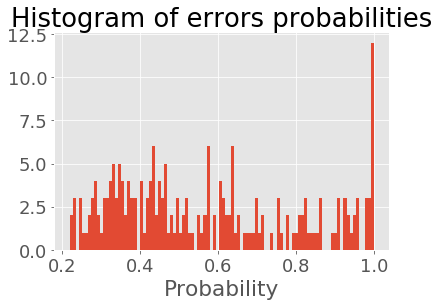

In [60]:
sq_cnn_eval.plot_probability_histogram()

In [38]:
dict_paths = sq_cnn_eval.get_image_paths_by_prediction(probs, labels, concept_labels=[c['label'] for c in sq_cnn_eval.concepts_evaluation])
name = []
count = []
for key in dict_paths.keys():
    if not dict_paths[key]['diagonal']:
        count.append(len(dict_paths[key]['image_paths']))
        name.append(key)
            
idx = np.argsort(count)[::-1]
name = np.array(name)
count = np.array(count)
ord_name= name[idx]

In [39]:
errors_cf_matrix = pd.DataFrame({'matrix_square':ord_name, 'count': count[idx]})

In [40]:
errors_cf_matrix.to_csv('gated_133_app_classes_more_confused.csv', index=False)

In [41]:
errors_cf_matrix

,count,matrix_square
0,7,folliculitis_common acquired melanocytic nevus
1,5,lichen planus_prurigo nodularis
2,5,tinea pedis_dyshidrotic eczema
3,4,lichen simplex chronicus_chronic plaque psoriasis
4,4,lichen planus_chronic plaque psoriasis
5,3,tattoo_chronic plaque psoriasis
6,3,atopic dermatitis_bruise
7,3,seborrheic dermatitis_psoriasis of the scalp
8,3,folliculitis_skin disorder caused by arthropod...
9,3,contact dermatitis_polymorphic light eruption


folliculitis_common acquired melanocytic nevus
7


/home/albert/.venv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



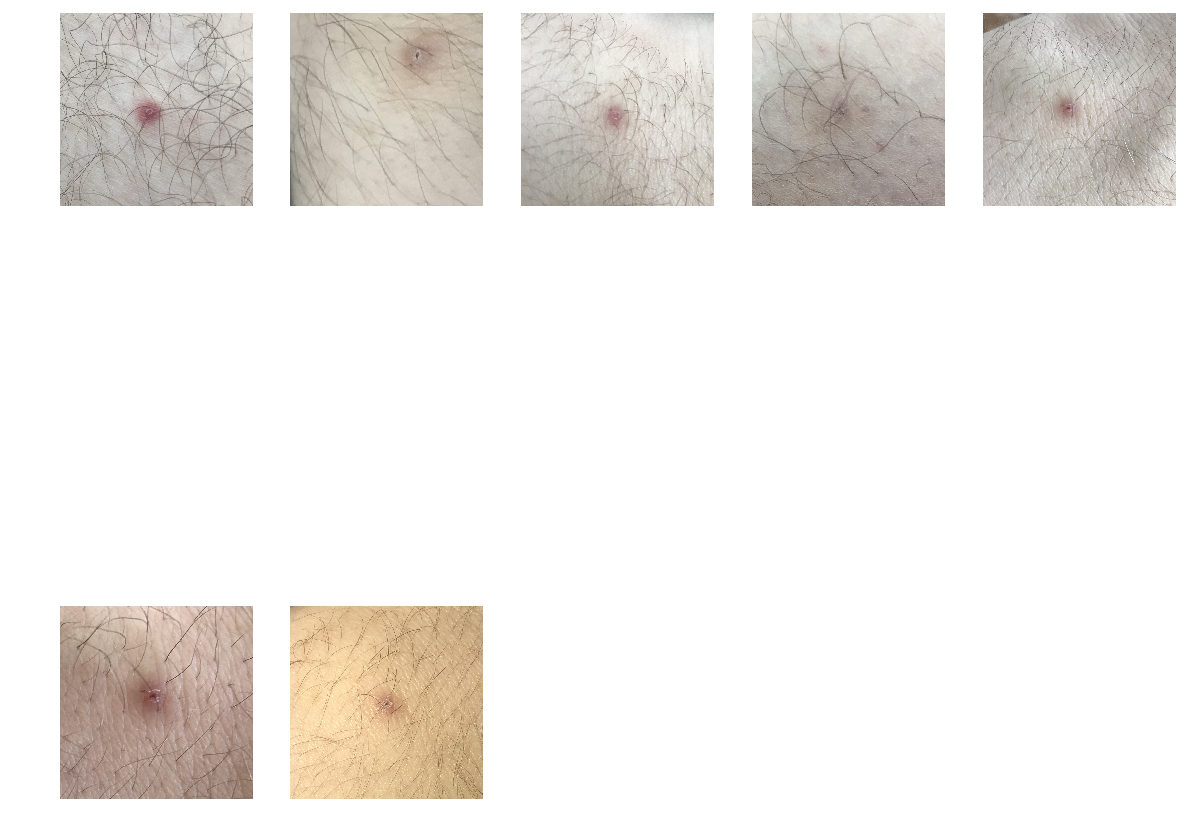

In [45]:
print(ord_name[0])
print(len(dict_paths[ord_name[0]]['image_paths']))
sq_cnn_eval.plot_images(n_images=10, image_paths=dict_paths[ord_name[0]]['image_paths'])

lichen planus_prurigo nodularis
5


/home/albert/.venv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



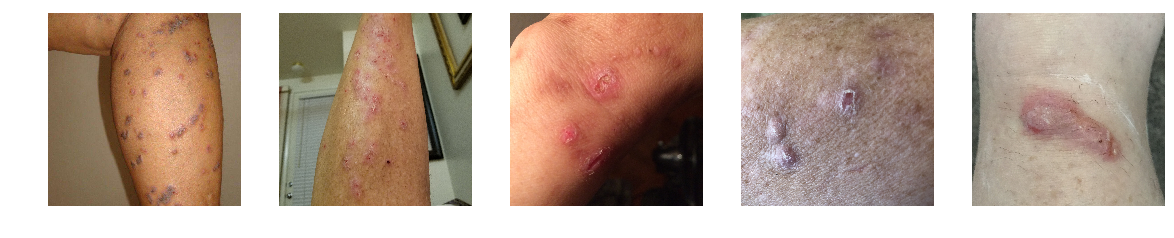

In [46]:
print(ord_name[1])
print(len(dict_paths[ord_name[1]]['image_paths']))
sq_cnn_eval.plot_images(n_images=10, image_paths=dict_paths[ord_name[1]]['image_paths'])

### Example where all the images are filtered before 2nd gate

In [67]:
results = sq_cnn_eval.evaluate(image_list[0:3], labels_list[0:3]) 

Making predictions from model  0
3/3 [==============================] - 0s 5ms/step
Applying threshold
Filtering outputs
Updating threshold mask...
Updating pass through mask...
All images have been already filtered before the 2 gate
There are only probabilities for the first gate


In [72]:
sq_cnn_eval.show_results('average')

,id,accuracy_top_1,accuracy_top_2,accuracy_top_3,weighted_precision,sensitivity,precision,f1_score,number_of_samples,number_of_classes
0,None,1.0,1.0,1.0,1.0,0.333,0.333,1.0,3,3


In [73]:
sq_cnn_eval.show_results('individual')

,id,class,sensitivity_top_1,sensitivity_top_2,sensitivity_top_3,precision,f1_score,TP,FP,FN,n_samples,% samples
0,None,not skin,1.0,1.0,1.0,1.0,1.0,3,0,0,3,100.0
1,None,tattoo,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0
2,None,clear skin,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0


### Example squashing classes not-skin and tattoos

In [93]:
gates_configuration_path = ['example/first_gate_squashing.yaml', 'example/n_way_gate.yaml']

In [94]:
sq_cnn_eval = SequentialCNNEvaluator(
    id='App model',
    gates_configuration_path=gates_configuration_path
)

/home/albert/.venv/lib/python3.5/site-packages/keras/engine/saving.py:292: UserWarning:

No training configuration found in save file: the model was *not* compiled. Compile it manually.



Loading model  model_max_acc_1gpu.h5
Loading model  model_max_acc_1gpu.h5
Loading model  model_max_acc_1gpu.h5
Models loaded:  3


In [95]:
results = sq_cnn_eval.evaluate(image_list, labels_list) 

Making predictions from model  0
427/427 [==============================] - 31s 72ms/step
Squashing classes
Applying threshold
Filtering outputs
Squashing labels... 
Updating threshold mask...
Updating pass through mask...
Making predictions from model  0
359/359 [==============================] - 35s 96ms/step
Making predictions from model  1
359/359 [==============================] - 39s 109ms/step
Making predictions from model  2
359/359 [==============================] - 46s 129ms/step


In [97]:
sq_cnn_eval.show_results('average')

,id,accuracy_top_1,accuracy_top_2,accuracy_top_3,accuracy_top_4,accuracy_top_5,accuracy_top_6,accuracy_top_7,accuracy_top_8,accuracy_top_9,accuracy_top_10,weighted_precision,sensitivity,precision,f1_score,number_of_samples,number_of_classes
0,App model,0.513,0.621,0.672,0.707,0.738,0.756,0.773,0.782,0.787,0.808,0.563,0.204,0.213,0.502,427,135


In [98]:
sq_cnn_eval.show_results('individual')

,id,class,sensitivity_top_1,sensitivity_top_2,sensitivity_top_3,sensitivity_top_4,sensitivity_top_5,sensitivity_top_6,sensitivity_top_7,sensitivity_top_8,sensitivity_top_9,sensitivity_top_10,precision,f1_score,TP,FP,FN,n_samples,% samples
0,App model,not skin_tattoo,0.789,0.816,0.816,0.816,0.816,0.816,0.816,0.816,0.816,0.816,0.882,0.833,30,4,8,38,8.90
1,App model,clear skin,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,0.588,20,14,14,34,7.96
2,App model,acne scarring,0.167,0.333,0.333,0.333,0.500,0.500,0.500,0.500,0.500,0.833,1.000,0.286,1,0,5,6,1.41
3,App model,acne variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,1,0,0,0.00
4,App model,acne vulgaris,0.929,0.929,0.929,0.929,0.929,0.929,0.929,0.929,1.000,1.000,0.650,0.765,13,7,1,14,3.28
5,App model,acneiform eruption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.00
6,App model,actinic keratosis,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,NaN,0,1,1,1,0.23
7,App model,asteototic eczema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.00
8,App model,atopic dermatitis,0.438,0.500,0.500,0.500,0.688,0.688,0.750,0.750,0.750,0.750,0.875,0.583,7,1,9,16,3.75
9,App model,atypical melanocytic proliferation and cannot ...,0.917,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.550,0.688,11,9,1,12,2.81
